# Mejorando el accuracy del arbol
## Oversampling y Undersampling
A pesar de usar estas tecnicas la precision del modelo parece no cambiar, esto es debido a que la informacion no esta balanceada. Ya que aprox mas del 80% de los pacientes no han desarrollado alguna enfermedad.
Esto se soluciona aplicando sobre muestreo y sub-muestreo. En este caso se haran ambos.

In [23]:
#Librerias 
import pandas as pd

#Arbol de decision
from sklearn.tree import DecisionTreeClassifier#-
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

#Para el bosque aleatorio.
from sklearn.ensemble import RandomForestClassifier

#Para el reporte
from sklearn.metrics import classification_report, accuracy_score,make_scorer#-

#Para balancear
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

#Pipeline
from imblearn.pipeline import Pipeline


In [3]:
#Importacion del dataset
dataset = pd.read_csv("framinghamClean.csv")
dataset.drop(["Unnamed: 0"], axis=1, inplace=True)
dataset.head()
#dataset.shape

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Preparando la informacion

In [4]:
columnas = dataset.columns.values.tolist()
predictors = columnas[:15]
target = columnas[-1]

In [5]:
X = dataset[predictors]
Y = dataset[target]

In [6]:
#X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.35)

In [28]:
oversample = RandomOverSampler(sampling_strategy='minority')

X_over, Y_over = oversample.fit_resample(X,Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_over,Y_over,test_size=0.35)

In [66]:
steps = [('under',RandomUnderSampler()),('model',DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

In [67]:
pipeline.fit(X_train,Y_train)

Pipeline(steps=[('under', RandomUnderSampler()),
                ('model', DecisionTreeClassifier())])

In [68]:
#Haciendo una prediccion
pipepred = pipeline.predict(X_test)

In [69]:
print(classification_report(Y_test,pipepred))

              precision    recall  f1-score   support

           0       0.99      0.80      0.88      1264
           1       0.83      0.99      0.90      1254

    accuracy                           0.89      2518
   macro avg       0.91      0.89      0.89      2518
weighted avg       0.91      0.89      0.89      2518



### Este simple tratamiento de la informacion al balancearla hizo mas eficiente el arbol. Y por ende la prediccion.

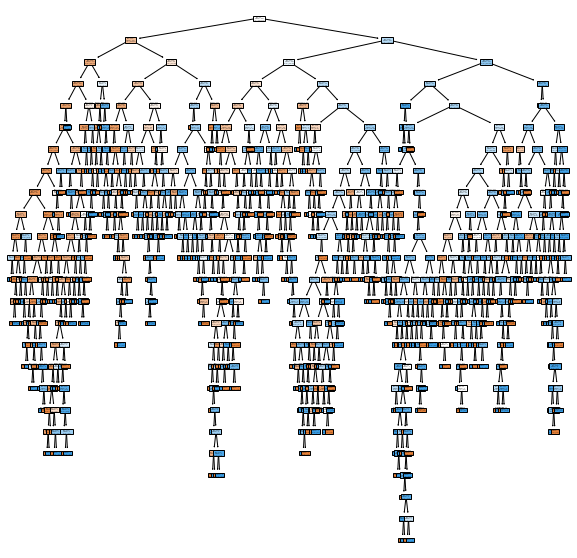

In [70]:
plt.figure(figsize=(10,10))
plot_tree(
    pipeline['model'],
    feature_names=columnas,
    filled=True)
plt.show()

In [76]:
#Se implementara un random forest para ver si tal vez se puede mejorar la precision
forest = RandomForestClassifier(n_jobs=2,oob_score=True,n_estimators=1000)
forest.fit(X_train,Y_train)

/Users/antonioreyesguerrero/Desktop/PythonCurso/Datos/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


RandomForestClassifier(n_estimators=1000, n_jobs=2, oob_score=True)

In [77]:
len(forest.oob_decision_function_)

4674

In [78]:
forest.oob_score_ #Un random forest mejoro 

0.9576379974326059

In [79]:
y_prediccion = forest.predict(X_test)

In [80]:
print(classification_report(Y_test,y_prediccion)) #Mejoro en general ambas variables, unicamente con un oversample

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      1264
           1       0.94      0.98      0.96      1254

    accuracy                           0.96      2518
   macro avg       0.96      0.96      0.96      2518
weighted avg       0.96      0.96      0.96      2518

